#####Hello!! I found a lovely data set here -> https://datacatalog.urban.org/dataset/debt-america-2023
#####About Debt in america in 2023. Im going to start out with the Auto debt and see what I can learn. 
##### Thanks urban.org!!
##### also got this other data set off of kaggle to add geographic data, and join using the fips code
##### https://www.kaggle.com/datasets/tsnowak/us-geographic-codes/



####### also try this dataset it might go well for you --> https://www.weather.gov/gis/Counties]


###### nvm i think better luck with this data set ---> https://public.opendatasoft.com/explore/dataset/us-county-boundaries/information/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&location=2,40.61349,40.02538&basemap=jawg.light

###### simple centroid data set ---> https://www.kaggle.com/datasets/canonicalized/county-centroids

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

auto_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/dia_lbls_all_autoretail_county_2022_02_14Sep2023.csv')
#fips_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/us_zip_fips_county.csv')

## had to add this latin line because of a ver strange error
#fips_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/us_county_boundaries.csv', encoding='latin-1') 

#fips_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/us-county-boundaries.csv', on_bad_lines='skip') 
fips_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/County Centroids.csv') 

fips_data_frame.head()


,state,county,cfips,latitude,longitude
0,Alabama,Autauga County,1001,32.5081,-86.6513
1,Alabama,Baldwin County,1003,30.7725,-87.7842
2,Alabama,Barbour County,1005,31.8832,-85.3931
3,Alabama,Bibb County,1007,33.0388,-87.0967
4,Alabama,Blount County,1009,34.0126,-86.5339


In [2]:
fips_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3135 non-null   object 
 1   county     3135 non-null   object 
 2   cfips      3135 non-null   int64  
 3   latitude   3135 non-null   float64
 4   longitude  3135 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 122.6+ KB


In [3]:
auto_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 20 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   County FIPS                                                          3143 non-null   int64  
 1   County Name                                                          3143 non-null   object 
 2   State Name                                                           3143 non-null   object 
 3   Auto/retail loan delinquency rate, All                               2853 non-null   float64
 4   Auto/retail loan delinquency rate, Comm of color                     508 non-null    float64
 5   Auto/retail loan delinquency rate, White comm                        2519 non-null   float64
 6   Auto/retail loan delinquency rate by credit score - Subprime, All    1717 non-null   float64
 7   Auto/r

In [4]:
data_frame = pd.merge(left = auto_data_frame, right = fips_data_frame, left_on = 'County FIPS', right_on = 'cfips', how = 'inner')

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3135 entries, 0 to 3134
Data columns (total 25 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   County FIPS                                                          3135 non-null   int64  
 1   County Name                                                          3135 non-null   object 
 2   State Name                                                           3135 non-null   object 
 3   Auto/retail loan delinquency rate, All                               2848 non-null   float64
 4   Auto/retail loan delinquency rate, Comm of color                     507 non-null    float64
 5   Auto/retail loan delinquency rate, White comm                        2516 non-null   float64
 6   Auto/retail loan delinquency rate by credit score - Subprime, All    1717 non-null   float64
 7   Auto/r

In [6]:
income_by_state = data_frame.groupby('State Name').agg({'Average household income, All':'mean', 'Auto/retail loan delinquency rate, All':'mean'})

In [7]:
income_by_state.sort_values('Average household income, All')

,"Average household income, All","Auto/retail loan delinquency rate, All"
State Name,,
Mississippi,60451.343902,0.088206
Arkansas,62401.396667,0.055208
Alabama,65083.481642,0.080121
West Virginia,65396.043636,0.039095
Kentucky,65596.704667,0.046596
Louisiana,68204.485469,0.071891
Missouri,68506.549478,0.043885
New Mexico,68577.366667,0.058243
South Carolina,68757.654565,0.083548


In [8]:
data_frame.head()

,County FIPS,County Name,State Name,"Auto/retail loan delinquency rate, All","Auto/retail loan delinquency rate, Comm of color","Auto/retail loan delinquency rate, White comm","Auto/retail loan delinquency rate by credit score - Subprime, All","Auto/retail loan delinquency rate by credit score - Near prime, All","Auto/retail loan delinquency rate by credit score - Prime, All","Share with auto loans, All","Share with auto loans, Comm of color","Share with auto loans, White comm","Share with auto/retail loan debt, All","Share with auto/retail loan debt, Comm of color","Share with auto/retail loan debt, White comm","Share of people in rural areas, White comm",Share of people of color,"Average household income, All","Average household income, Comm of color","Average household income, White comm",state,county,cfips,latitude,longitude
0,1001,"Autauga County, Alabama",Alabama,0.063422,NaN,0.064263,0.262821,0.013072,0.000000,0.262396,0.278689,0.259368,0.372702,0.442623,0.368267,0.406768,0.269029,79497.56,59924.12,86069.90,Alabama,Autauga County,1001,32.5081,-86.6513
1,1003,"Baldwin County, Alabama",Alabama,0.042843,NaN,0.042618,0.241803,0.020534,0.000491,0.331540,NaN,0.332334,0.399328,NaN,0.400327,0.375865,0.178245,87234.06,65210.40,90904.80,Alabama,Baldwin County,1003,30.7725,-87.7842
2,1005,"Barbour County, Alabama",Alabama,0.086817,NaN,NaN,0.305882,0.015873,0.000000,0.278796,NaN,0.345454,0.397906,NaN,0.418182,0.659200,0.553902,55066.45,36577.48,73941.90,Alabama,Barbour County,1005,31.8832,-85.3931
3,1007,"Bibb County, Alabama",Alabama,0.104869,NaN,0.091703,0.333333,NaN,0.000000,0.304762,0.261364,0.311808,0.411111,0.420455,0.409594,1.000000,0.259504,67395.92,46330.31,73267.97,Alabama,Bibb County,1007,33.0388,-87.0967
4,1009,"Blount County, Alabama",Alabama,0.040788,NaN,0.040788,0.174699,0.000000,0.000000,0.298812,NaN,0.298981,0.397850,NaN,0.398075,0.904894,0.140768,71848.80,56594.48,73629.93,Alabama,Blount County,1009,34.0126,-86.5339


In [9]:
drop_alaska_hawaii_mask = data_frame['longitude'] > -125

lower_48_frame = data_frame[drop_alaska_hawaii_mask]


#-125 cutoff

<Axes: xlabel='longitude', ylabel='latitude'>

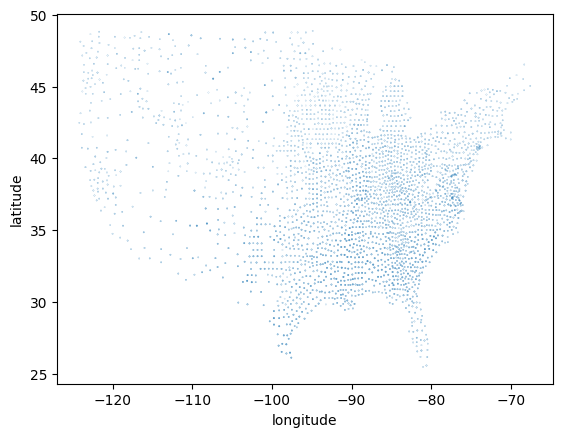

In [10]:
lower_48_frame.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = 'Auto/retail loan delinquency rate, All')

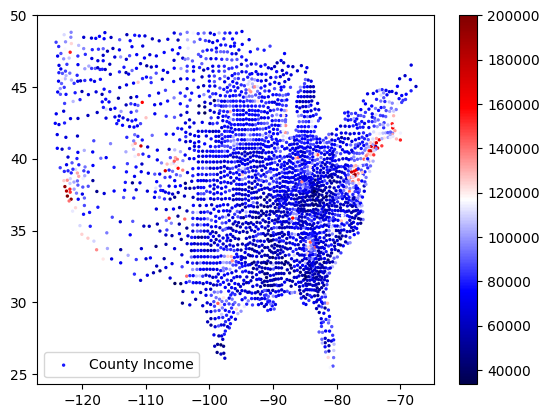

In [11]:
#### gonna try to use plt here

x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Average household income, All']
size = lower_48_frame['Average household income, All'] / 50000

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic', label = 'County Income')
plt.rcParams["figure.figsize"] = (10,5)
#plt.figure(figsize=(80,20))
plt.legend(loc = "lower left")
plt.colorbar()

plt.show()


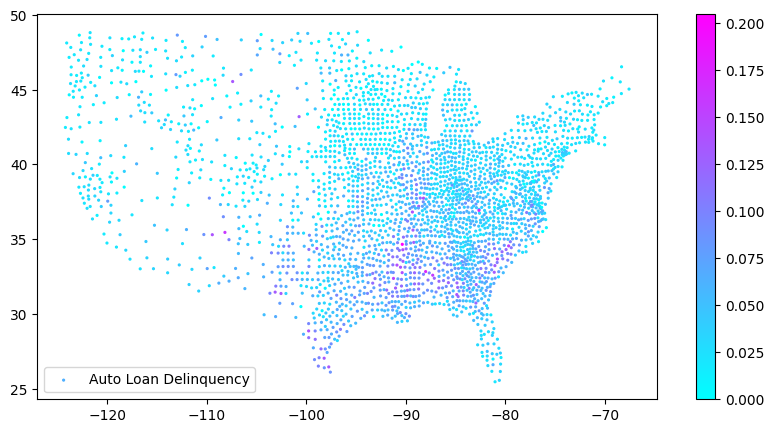

In [12]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Auto/retail loan delinquency rate, All']

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'cool', label = 'Auto Loan Delinquency', marker='h')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc = "lower left")
plt.colorbar()
plt.show()


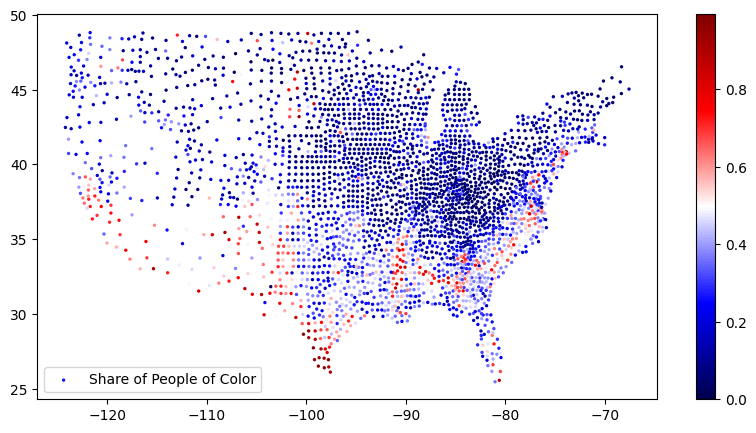

In [13]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Share of people of color']


plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic', label = 'Share of People of Color')
plt.rcParams["figure.figsize"] = (10,5)
plt.colorbar()
plt.legend(loc = "lower left")

plt.show()

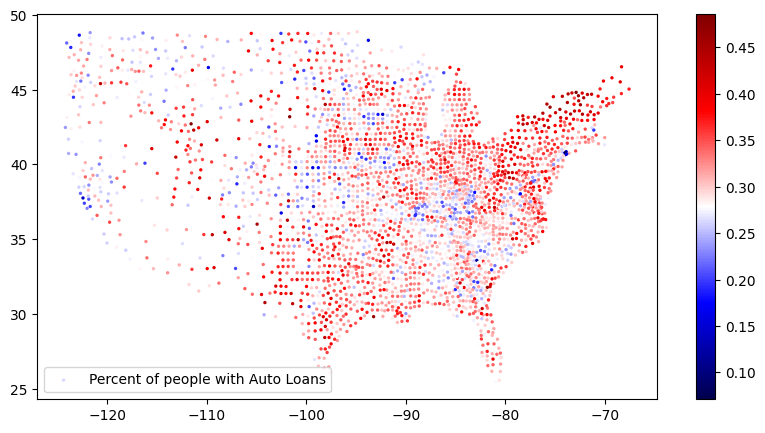

In [14]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Share with auto loans, All']

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic', label = 'Percent of people with Auto Loans')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc = "lower left")
plt.colorbar()
plt.show()

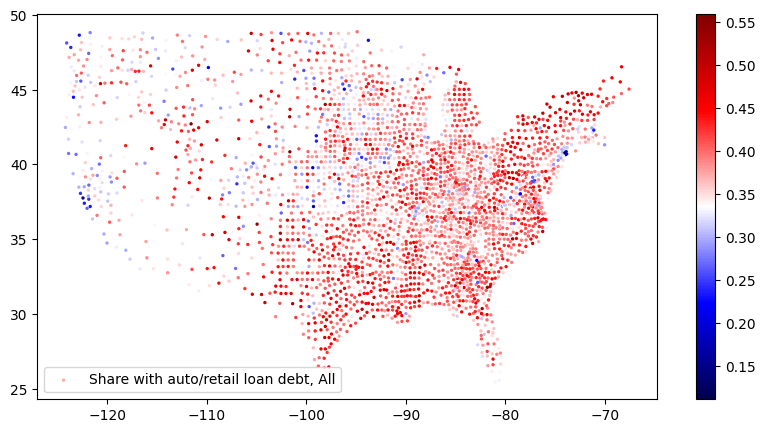

In [15]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Share with auto/retail loan debt, All']

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic', label = 'Share with auto/retail loan debt, All')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc = "lower left")
plt.colorbar()
plt.show()